<a href="https://colab.research.google.com/github/benwichmann/GLC2022_FinalProject/blob/main/TestRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [10]:
!conda --version
!which conda

conda 4.9.2
/usr/local/bin/conda


In [2]:
#!conda create --name firstEnv

#!conda env update -n base -f environment.yml
# activate your conda environment
%%bash
source activate firstEnv
python

# python commands are ready to run within your environment
import sys
print("Python version")
print (sys.version)

Python version
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


Could not find conda environment: firstEnv
You can list all discoverable environments with `conda info --envs`.



In [3]:
!rm -rf GLC2022_FinalProject
!git clone https://github.com/benwichmann/GLC2022_FinalProject.git

Cloning into 'GLC2022_FinalProject'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 65 (delta 10), reused 50 (delta 5), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
!pip install -r GLC2022_FinalProject/requirements2.txt

In [ ]:
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

#Import Enviroment Modules and Variabls

In [11]:
%pylab inline --no-import-all
from pathlib import Path
DATA_PATH = Path("/content/drive/MyDrive/ds3/")

import matplotlib.pyplot as plt
%matplotlib inline
import rasterio
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from GLC2022_FinalProject.GLC.plotting import plot_map
from GLC2022_FinalProject.GLC.data_loading.environmental_raster import PatchExtractor


Populating the interactive namespace from numpy and matplotlib


In [63]:
DATA_PATH = Path("/content/drive/MyDrive/ds3/")

df_obs_us = pd.read_csv(DATA_PATH / "observations" / "observations_us_train.csv", sep=";")#, index_col="observation_id")
df_obs_fr = pd.read_csv(DATA_PATH / "observations" / "observations_fr_train.csv", sep=";")#, index_col="observation_id")
df_obs = pd.concat((df_obs_fr, df_obs_us))
print("Number of observations for training FR: {}".format(len(df_obs_us)))
print("Number of observations for training US: {}".format(len(df_obs_fr)))
print("Number of observations for testingtot: {}".format(len(df_obs)))

Number of observations for training FR: 956231
Number of observations for training US: 671244
Number of observations for testingtot: 1627475


#Parse Data for Patches

In [13]:
cut_samples = 100000 

In [26]:
df_a = df_obs.iloc[:cut_samples,:]
df_y = df_a['species_id']
df_a = df_a.drop(['subset'],axis=1)
df_a = df_a.drop(['species_id'],axis=1)
X = np.asarray(df_a)
print(df_a)

        observation_id   latitude  longitude
0             10561949  45.705116   1.424622
1             10131188  45.146973   6.416794
2             10799362  46.783695  -2.072855
3             10392536  48.604866  -2.825003
4             10335049  48.815567  -0.161431
...                ...        ...        ...
249995        10289380  43.697075   3.671242
249996        10022148  45.257797   5.660192
249997        10562577  44.564808   4.279166
249998        10215845  47.410034   4.895005
249999        10779562  45.615101   4.656168

[250000 rows x 3 columns]


In [28]:
#del extractor
extractor = PatchExtractor(DATA_PATH / "rasters", size=1) 
extractor.add_all_rasters()

print("Number of rasters: {}".format(len(extractor)))

Number of rasters: 27


In [29]:
features = []
for c in X:
  features.append(list(c)+list(extractor[c[1],c[2]]))

print(features[1])

[10131188.0, 45.14697265625, 6.416794300079349, 4.5875, 9.058333, 33.302696, 664.6022, 19.9, -7.3, 27.2, 1.4166667, 12.8, 12.833333, -3.15, 1323.0, 141.0, 75.0, 16.490602, 399.0, 262.0, 265.0, 362.0, 1771.0, 1219.0, 28.0, 18.0, 49.0, 61.0, 38.0, 45.0]


In [30]:
df_X = pd.DataFrame(features)
df_X = df_X.drop([0],axis=1)
dataset = pd.concat([df_X,df_y],axis=1)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,species_id
0,45.705116,1.424622,11.229167,8.724999,37.286324,556.815063,24.5,1.1,23.400000,8.033333,...,287.0,1678.0,1381.0,13.0,20.0,26.0,58.0,36.0,44.0,241
1,45.146973,6.416794,4.587500,9.058333,33.302696,664.602173,19.9,-7.3,27.200001,1.416667,...,362.0,1771.0,1219.0,28.0,18.0,49.0,61.0,38.0,45.0,101
2,46.783695,-2.072855,12.625000,6.650000,34.635418,466.439606,23.4,4.2,19.200001,8.116667,...,253.0,1808.0,1351.0,21.0,24.0,31.0,72.0,34.0,42.0,700
3,48.604866,-2.825003,11.579166,6.525000,37.500000,406.305176,21.4,4.0,17.400000,7.800000,...,282.0,1667.0,1277.0,18.0,22.0,24.0,63.0,37.0,40.0,1456
4,48.815567,-0.161431,10.295834,7.475000,36.286407,487.071289,22.1,1.5,20.600000,5.533333,...,235.0,1379.0,1321.0,19.0,25.0,26.0,65.0,56.0,20.0,157


#Incase Fitting Fails save dataset to just pull from Gdrive

In [31]:
DATA_PATH = Path("/content/drive/MyDrive/ds3/")
dataset.to_csv(os.path.join(DATA_PATH, r"loc_raster_SpId_250000.csv"))

In [42]:
dataset = pd.read_csv(DATA_PATH / "loc_raster_SpId_100000.csv",  index_col=[0])

##After analyzing the feature vectors, remove with threshold .035

In [43]:
#thr035 = [2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 23, 24, 27, 28]
th04 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28]
th03 = [6, 7, 14, 15, 18]

dataset.drop(dataset.columns[th03], axis = 1, inplace=True)
dataset.head()


,1,2,3,4,5,6,9,10,11,12,...,21,22,23,24,25,26,27,28,29,species_id
0,45.705116,1.424622,11.229167,8.724999,37.286324,556.81506,23.4,8.033333,18.266666,18.266666,...,287.0,1678.0,1381.0,13.0,20.0,26.0,58.0,36.0,44.0,241
1,45.146973,6.416794,4.587500,9.058333,33.302696,664.60220,27.2,1.416667,12.800000,12.833333,...,362.0,1771.0,1219.0,28.0,18.0,49.0,61.0,38.0,45.0,101
2,46.783695,-2.072855,12.625000,6.650000,34.635418,466.43960,19.2,8.116667,18.366667,18.416666,...,253.0,1808.0,1351.0,21.0,24.0,31.0,72.0,34.0,42.0,700
3,48.604866,-2.825003,11.579166,6.525000,37.500000,406.30518,17.4,7.800000,16.566666,16.733334,...,282.0,1667.0,1277.0,18.0,22.0,24.0,63.0,37.0,40.0,1456
4,48.815567,-0.161431,10.295834,7.475000,36.286407,487.07130,20.6,5.533333,16.383333,16.383333,...,235.0,1379.0,1321.0,19.0,25.0,26.0,65.0,56.0,20.0,157


In [22]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#Continue preprocessing for RF

In [44]:
df = clean_dataset(dataset)
print(df.shape)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(96354, 25)
(77083, 24)
(77083,)
(19271, 24)
(19271,)


In [45]:
#normalize the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [34]:
#Number of trees in random forest
n_estimators = 100 #[int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features ='sqrt'
# Maximum number of levels in tree
max_depth = 16
# Minimum number of samples required to split a node
min_samples_split = 30
# Minimum number of samples required at each leaf node
min_samples_leaf = 50
# Method of selecting samples for training each tree
bootstrap = True

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 30, 'min_samples_leaf': 50, 'bootstrap': True}


In [ ]:
#Number of trees in random forest
n_estimators = [50, 100, 150] 
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [8,16,32]
# Minimum number of samples required to split a node
min_samples_split = [15,30,45,60]
# Minimum number of samples required at each leaf node
min_samples_leaf = 50
# Method of selecting samples for training each tree
bootstrap = True

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 60,
 'n_estimators': 100}

In [46]:
rf_Model = RandomForestClassifier(n_estimators = 100,max_features ='sqrt',max_depth = 16,min_samples_split = 60, min_samples_leaf = 50,bootstrap = True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#rf_random = RandomizedSearchCV(estimator = rf_Model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
#rf_model = RandomizedSearch


In [47]:
#rf_random.fit(x_train, y_train) #fit is to initiate training process
rf_Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=60)

In [48]:
train_results = rf_Model.score(x_train,y_train)
test_results = rf_Model.score(x_test,y_test)
print (f'Train Accuracy - : {train_results}')
print (f'Test Accuracy - : {test_results}')

Train Accuracy - : 0.19220839873902157
Test Accuracy - : 0.025841938664314255


In [49]:
from datetime import datetime

file1 = open(DATA_PATH / "myRFresults.txt", "a")
min_samples_split = 60 
rf_str = str(n_estimators) + ":" + str(max_features) + ":" + str(max_depth) + ":" + str(min_samples_split) + ":" + str(min_samples_leaf)
now = datetime.now()
#str1 = str(now) + ", Normalized Samples = {}, TrainAcc={:.4f}, TestAcc={:.5f}, RF={}".format(cut_samples, train_results,test_results, rf_str)
str1 = str(now) + ",Feat <.03 Remove Samples = {}, TrainAcc={:.4f}, TestAcc={:.5f}, RF={}".format(cut_samples, train_results,test_results, rf_str)

file1.write(str1)
file1.close()

#Measure Feature importance

Feature: 0, Score: 0.08845
Feature: 1, Score: 0.08909
Feature: 2, Score: 0.02721
Feature: 3, Score: 0.03147
Feature: 4, Score: 0.04726
Feature: 5, Score: 0.03807
Feature: 6, Score: 0.01796
Feature: 7, Score: 0.01323
Feature: 8, Score: 0.02016
Feature: 9, Score: 0.04621
Feature: 10, Score: 0.02436
Feature: 11, Score: 0.01965
Feature: 12, Score: 0.02233
Feature: 13, Score: 0.02633
Feature: 14, Score: 0.01978
Feature: 15, Score: 0.01151
Feature: 16, Score: 0.04291
Feature: 17, Score: 0.02387
Feature: 18, Score: 0.01783
Feature: 19, Score: 0.02045
Feature: 20, Score: 0.02211
Feature: 21, Score: 0.06915
Feature: 22, Score: 0.05781
Feature: 23, Score: 0.03080
Feature: 24, Score: 0.02972
Feature: 25, Score: 0.04424
Feature: 26, Score: 0.03541
Feature: 27, Score: 0.03010
Feature: 28, Score: 0.03254


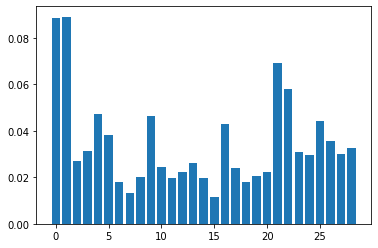

In [6]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
#, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
toss_feature = []
z = 0
for i in importance:
  if i < 0.025: 
    toss_feature.append(z)
  z = z + 1

print(toss_feature)

[6, 7, 8, 10, 11, 12, 14, 15, 17, 18, 19, 20]


#test 30 acc

In [ ]:
from GLC2022_FinalProject.GLC.submission import generate_submission_file

df_obs_fr_test = pd.read_csv(DATA_PATH / "observations" / "observations_fr_test.csv", sep=";", index_col="observation_id")
df_obs_us_test = pd.read_csv(DATA_PATH / "observations" / "observations_us_test.csv", sep=";", index_col="observation_id")

df_obs_test = pd.concat((df_obs_fr_test, df_obs_us_test))

obs_id_test = df_obs_test.index.values

print("Number of observations for testing: {}".format(len(df_obs_test)))

df_obs_test.head()

In [53]:
obs_id_train = df_obs.index[df_obs["subset"] == "train"].values
obs_id_val = df_obs.index[df_obs["subset"] == "val"].values

y_train = df_obs.loc[obs_id_train]["species_id"].values
y_val = df_obs.loc[obs_id_val]["species_id"].values

n_val = len(obs_id_val)
print("Validation set size: {} ({:.1%} of train observations)".format(n_val, n_val / len(df_obs)))

Validation set size: 40080 (2.5% of train observations)


In [56]:
first_30_species = np.arange(30)
s_pred = np.tile(first_30_species[None], (len(df_obs_test), 1))

In [58]:
SUBMISSION_PATH = Path("submissions")
os.makedirs(SUBMISSION_PATH, exist_ok=True)

In [60]:
first_30_species = np.arange(30)
s_pred = np.tile(first_30_species[None], (len(df_obs_test), 1))

In [61]:
generate_submission_file(SUBMISSION_PATH / "sample_submission.csv", df_obs_test.index, s_pred)

In [65]:
df_env = pd.read_csv(DATA_PATH / "pre-extracted" / "environmental_vectors.csv", sep=";", index_col="observation_id")

X_train = df_env.loc[obs_id_train].values
X_val = df_env.loc[obs_id_val].values
X_test = df_env.loc[obs_id_test].values

KeyError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1)
est.fit(X_train, y_train)